# Solar System Data Analysis
By Sarthak Dahal

Data Science student @The University of Georgia

This project aims to analyze the Solar System dataset. It contains information about various celestial objects such as planets, moons, and the Sun. The dataset includes details like the radius, mass, density, gravity, semi-major axis, orbital period, type of object, discovery year, and position in the solar system.

The objective of this analysis is to provide insights into the physical and orbital characteristics of these celestial bodies.

## Dataset Description

Below are the detailed descriptions of each parameter:

- **Object:** Name of the celestial object.
- **Radius (km):** Radius of the object in kilometers.
- **Mass (10e24 kg):** Mass of the object in units of \(10^{24}\) kilograms.
- **Density (g/cm³):** Density of the object in grams per cubic centimeter.
- **Gravity (m/s²):** Gravitational acceleration on the surface of the object in meters per second squared.
- **Semi-major axis (km):** Semi-major axis of the object's orbit in kilometers.
- **Orbital period (days):** Time taken by the object to complete one orbit around the Sun, in days.
- **Type:** Type of the object (e.g., star, planet, moon).
- **Moon of:** If the object is a moon, this column indicates its parent planet.
- **Year of discovery:** Year in which the object was discovered.
- **Position:** Position of the object in the solar system (e.g., inner solar system, outer solar system)

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
file_path = 'SolarSystemDataset.csv'
df = pd.read_csv(file_path)

df.head()

,Object,Radius (km),Mass (10e24 kg),Density (g/cm3),Gravity (m/s2),Semi-major axis (km),Orbital period (days),Type,Moon of,Year of discovery,Position
0,Sun,696342.0,1988500.000,1.408,274.00,NaN,NaN,star,NaN,NaN,NaN
1,Jupiter,69911.0,1898.200,1.326,24.79,7.785700e+08,4332.59,planet (gas giant),NaN,NaN,outer solar system
2,Saturn,58232.0,568.340,0.687,10.00,1.433530e+09,10759.22,planet (gas giant),NaN,NaN,outer solar system
3,Uranus,25362.0,86.813,1.270,8.69,2.875040e+09,30688.50,planet (gas giant),NaN,1781.0,outer solar system
4,Neptune,24622.0,102.413,1.638,11.15,4.500000e+09,60182.00,planet (gas giant),NaN,1846.0,outer solar system


## Basic Data Cleaning

In [3]:
print("Missing values before filling:")
print(df.isnull().sum())

Missing values before filling:
Object                    0
Radius (km)               0
Mass (10e24 kg)           0
Density (g/cm3)           0
Gravity (m/s2)            0
Semi-major axis (km)      1
Orbital period (days)     1
Type                      0
Moon of                  14
Year of discovery         8
Position                  1
dtype: int64


In [4]:
df.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
df.fillna(0, inplace=True)

infinite_values_count = df.isin([float('inf'), float('-inf')]).sum().sum()

print(f"Number of infinite values: {infinite_values_count}")  
print("Completed conversion of infinite values.")

Number of infinite values: 0
Completed conversion of infinite values.


## Simple Data analysis & Visualization

### Which is the largest body by size in the Solar System?

In [5]:
largest_body = df.loc[df['Radius (km)'].idxmax()]

print("The largest body in our solar system by size is:")
print(f"Name: {largest_body['Object']}")
print(f"Radius (km): {largest_body['Radius (km)']}")

The largest body in our solar system by size is:
Name: Sun
Radius (km): 696342.0


#### Data below excludes the Sun from comparison due to most of these variations being directly influenced by the Sun.

These observations provide insights into the fundamental differences between various celestial bodies in the solar system, highlighting the diversity in size, gravity, density, and orbital characteristics.

### Largest body in the Solar System

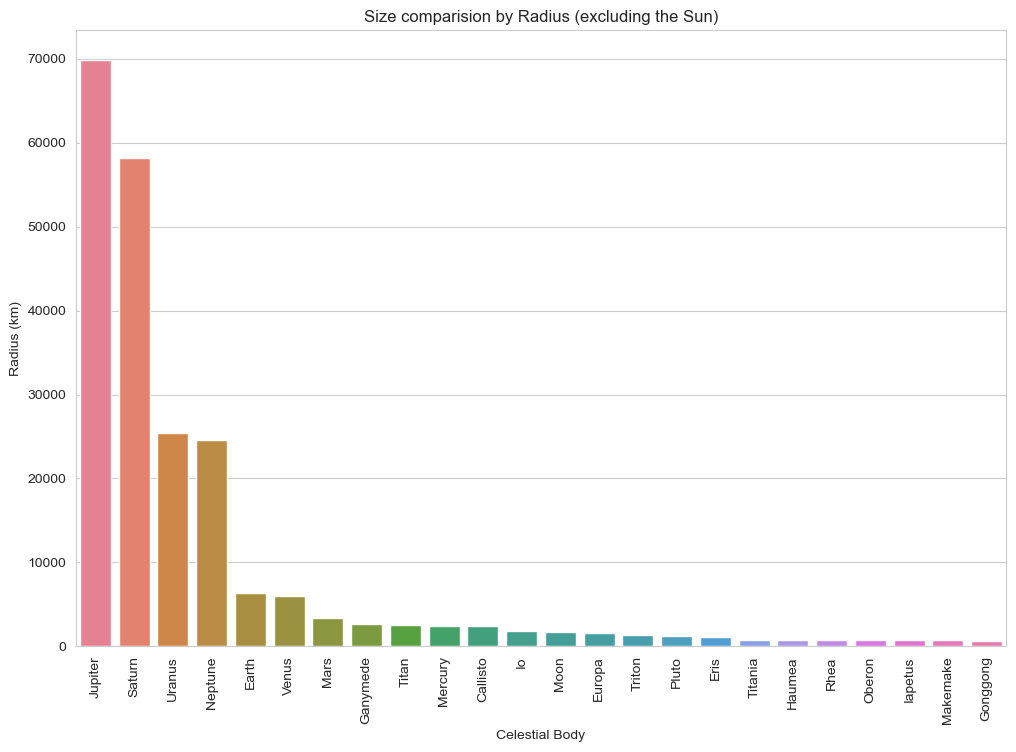

In [6]:
other_bodies = df[df['Object'] != 'Sun']

plt.figure(figsize=(12, 8))
sns.barplot(x=other_bodies['Object'], y=other_bodies['Radius (km)'], palette='husl')
plt.xlabel('Celestial Body')
plt.ylabel('Radius (km)')
plt.title('Size comparision by Radius (excluding the Sun)')
plt.xticks(rotation=90)
plt.show()

#### Observations:

- **Jupiter**: Jupiter has the largest radius among the celestial bodies, highlighting its status as the largest planet in the solar system.
- **Saturn and Uranus**: Saturn follows as the second largest, with Uranus being significantly smaller but still larger than Neptune.
- **Smaller Bodies**: Smaller bodies, including moons and dwarf planets, have much smaller radii, demonstrating the significant size disparity between these and the gas giants.

### Gravity of Celestial Bodies

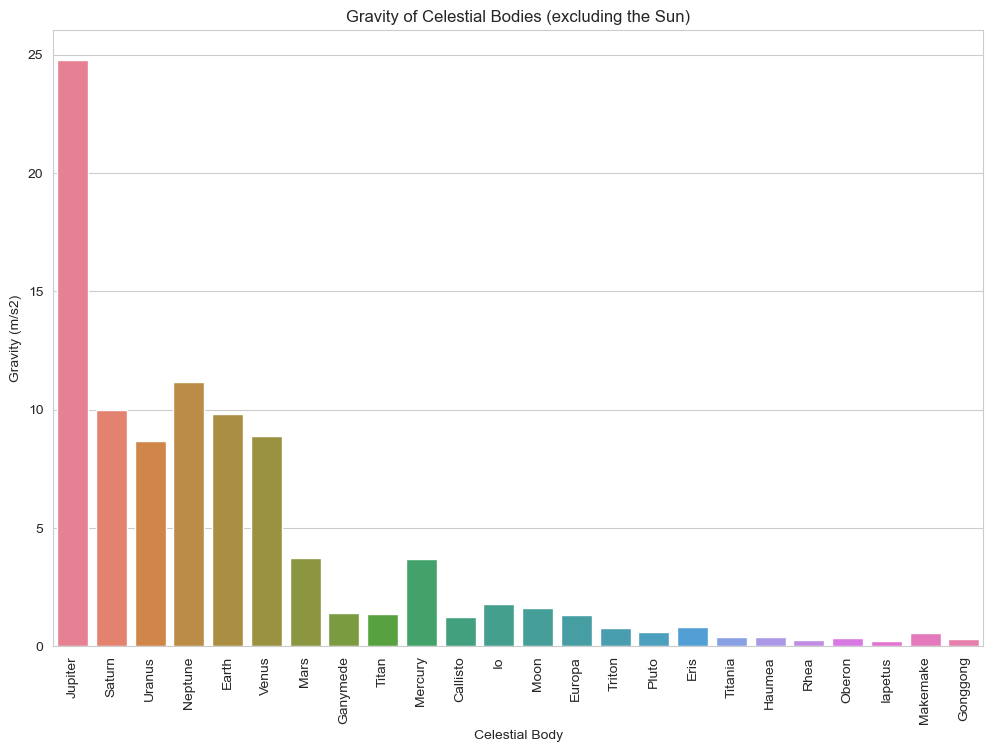

In [7]:
plt.figure(figsize=(12, 8))
sns.barplot(x=other_bodies['Object'], y=other_bodies['Gravity (m/s2)'], palette='husl')
plt.xlabel('Celestial Body')
plt.ylabel('Gravity (m/s2)')
plt.title('Gravity of Celestial Bodies (excluding the Sun)')
plt.xticks(rotation=90)
plt.show()

#### Observations:

- **Jupiter**: Jupiter exhibits the highest gravity, aligning with its massive size and significant influence in the solar system.
- **Saturn and Neptune**: Saturn and Neptune also have high gravitational forces, though not as pronounced as Jupiter's.
- **Smaller Moons and Dwarf Planets**: The smaller moons and dwarf planets have considerably lower gravitational forces, reflecting their smaller masses and sizes.



### Density of Celestial Bodies

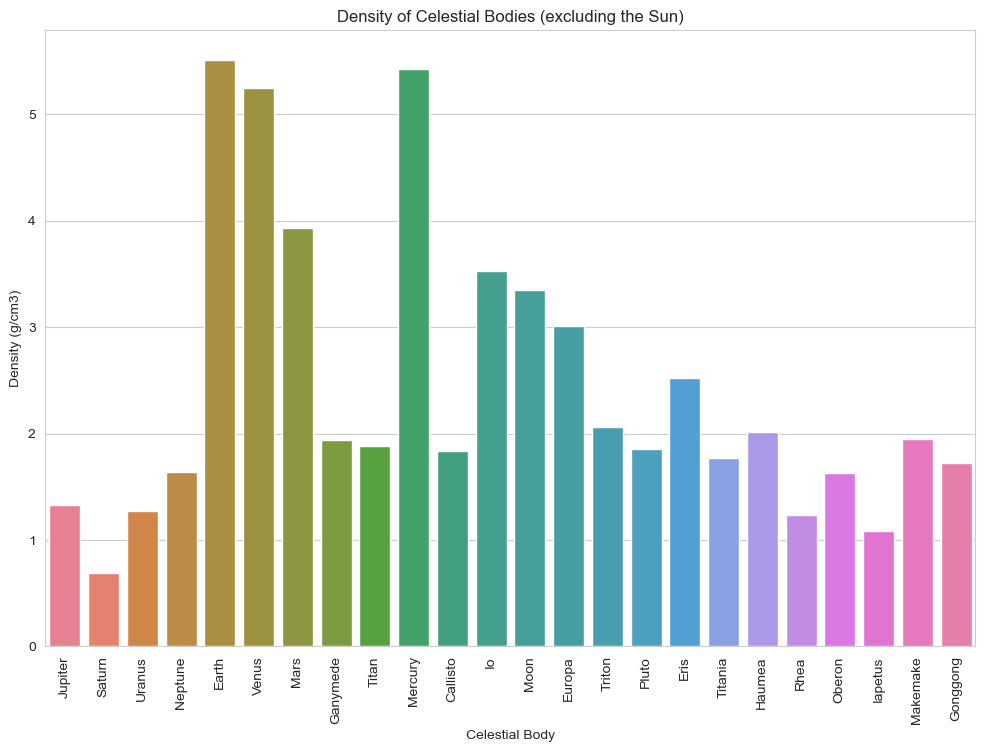

In [8]:
plt.figure(figsize=(12, 8))
sns.barplot(x=other_bodies['Object'], y=other_bodies['Density (g/cm3)'], palette='husl')
plt.xlabel('Celestial Body')
plt.ylabel('Density (g/cm3)')
plt.title('Density of Celestial Bodies (excluding the Sun)')
plt.xticks(rotation=90)
plt.show()

#### Observations:

- **Terrestrial Planets**: Earth and Venus are the densest celestial bodies, indicating their rocky compositions and heavy elemental make-up.
- **Gas Giants**: Jupiter and Saturn have much lower densities, suggesting they are primarily composed of lighter elements such as hydrogen and helium.
- **Moons and Dwarf Planets**: These bodies show a wide range of densities, indicating diverse compositions from rocky and icy mixtures to more homogeneous structures.


### Orbital periods of Celestial Bodies

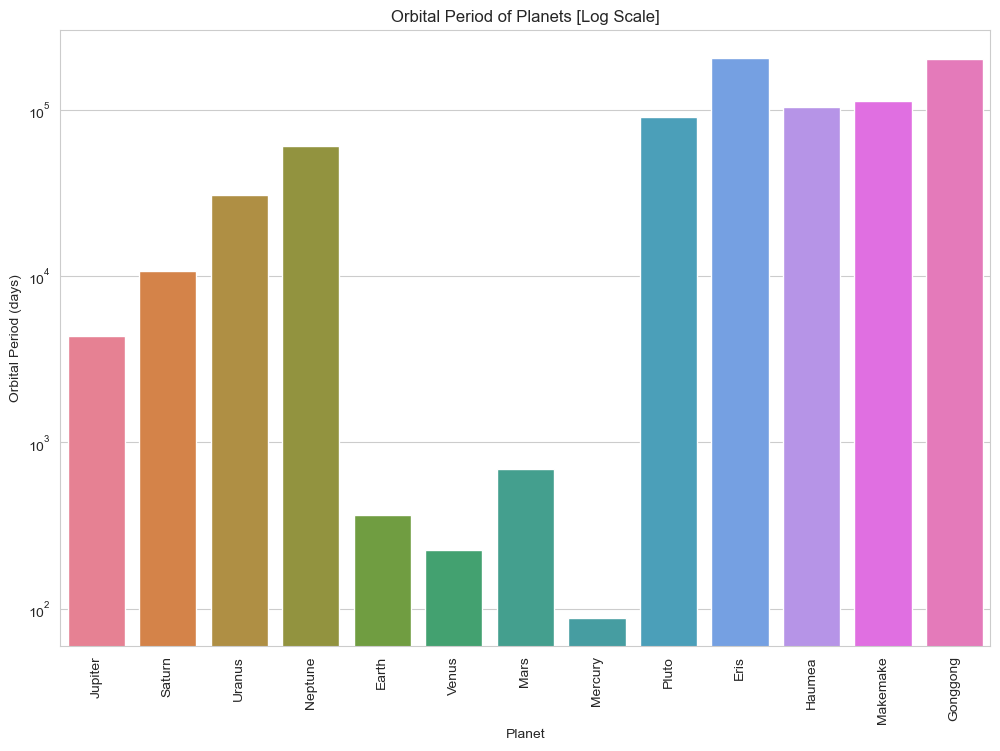

In [18]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=planets['Object'], y=planets['Orbital period (days)'], palette='husl')
plt.xlabel('Planet')
plt.ylabel('Orbital Period (days)')
plt.title('Orbital Period of Planets [Log Scale]')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

#### Observations:

- **Inner vs. Outer Planets**: Inner planets like Mercury and Venus have significantly shorter orbital periods compared to outer planets like Neptune and Pluto.
- **Dwarf Planets**: Dwarf planets such as Eris and Gonggong have the longest orbital periods, reflecting their distant positions from the Sun.
- **Distance Relationship**: There is a clear relationship between a planet’s distance from the Sun and its orbital period, with more distant planets taking much longer to complete an orbit.


### Understanding the Objects, Types, and their positions in the Solar System

In [10]:
object_info = other_bodies[['Object', 'Type', 'Position']]
object_info

,Object,Type,Position
1,Jupiter,planet (gas giant),outer solar system
2,Saturn,planet (gas giant),outer solar system
3,Uranus,planet (gas giant),outer solar system
4,Neptune,planet (gas giant),outer solar system
5,Earth,planet (terrestrial),inner solar system
6,Venus,planet (terrestrial),inner solar system
7,Mars,planet (terrestrial),inner solar system
8,Ganymede,moon,outer solar system
9,Titan,moon,outer solar system
10,Mercury,planet (terrestrial),outer solar system


The table above provides an overview of the different types of celestial bodies in the solar system and their positions. From this information, we can infer the general distribution and characteristics of these bodies. For instance, the outer solar system is predominantly populated by gas and ice giants with numerous moons, while the inner solar system is home to smaller, rocky planets. Dwarf planets, on the other hand, are mostly found in the outer regions, reflecting their formation and orbital characteristics.

### Types of Celestial Bodies
- **Planets**: The primary large bodies orbiting the Sun. Examples include Earth, Mars, Jupiter, and Saturn.
- **Moons**: Natural satellites that orbit planets. Examples include Ganymede (orbiting Jupiter) and Titan (orbiting Saturn).
- **Dwarf Planets**: Smaller than regular planets, often found in the outer regions of the solar system. Examples include Pluto and Eris.

### Positions in the Solar System
- **Inner Solar System**: Contains planets like Mercury, Venus, Earth, and Mars. These planets are characterized by shorter orbital periods and higher temperatures.
- **Outer Solar System**: Contains gas giants like Jupiter and Saturn, and ice giants like Uranus and Neptune. These planets have longer orbital periods and a larger number of moons.
- **Dwarf Planets and Moons**: Many of these bodies are located in the outer regions of the solar system, often beyond Neptune.

### Mass of bodies vs. Gravity 

This scatter plot shows the relationship between mass and gravity across different types of celestial bodies in the solar system, highlighting the distinct characteristics of gas giants, terrestrial planets, moons, and dwarf planets.

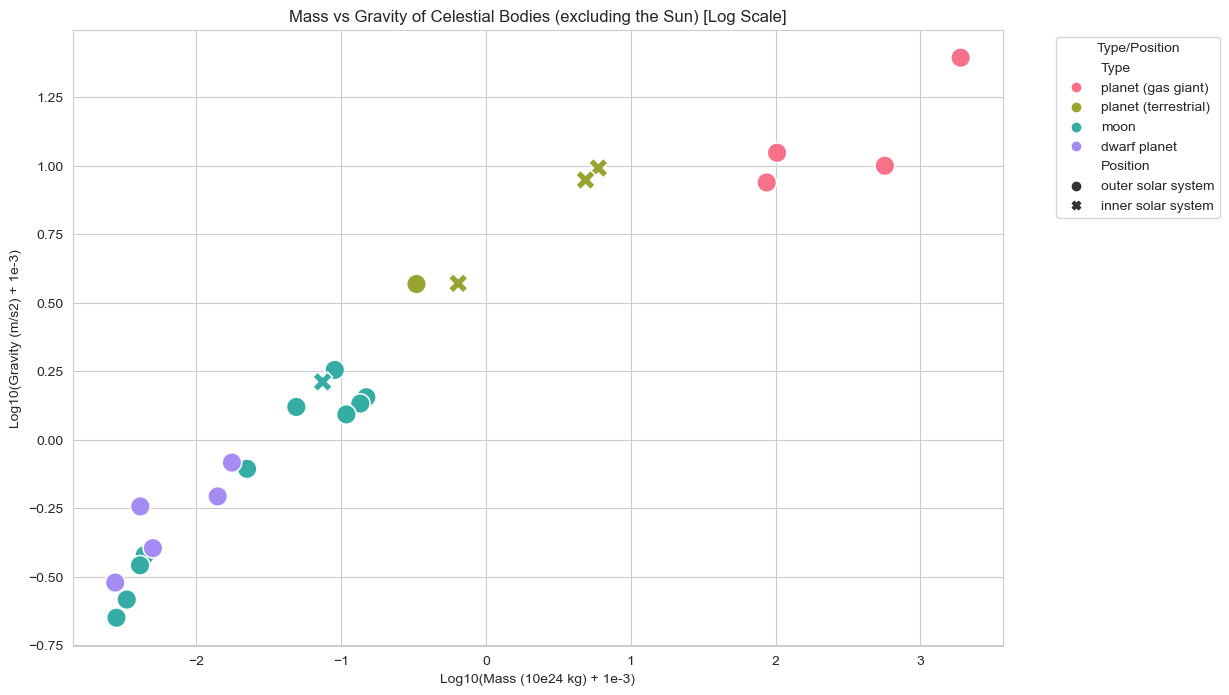

In [11]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=np.log10(other_bodies['Mass (10e24 kg)'] + 1e-3),
    y=np.log10(other_bodies['Gravity (m/s2)'] + 1e-3),
    hue=other_bodies['Type'], 
    style=other_bodies['Position'], 
    palette='husl',
    s=200
)

plt.xlabel('Log10(Mass (10e24 kg) + 1e-3)')
plt.ylabel('Log10(Gravity (m/s2) + 1e-3)')
plt.title('Mass vs Gravity of Celestial Bodies (excluding the Sun) [Log Scale]')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Type/Position')
plt.show()

#### Observations:

- **Gas Giants**: The gas giants (represented in red) have significantly higher masses and gravitational forces compared to other celestial bodies. Jupiter, in particular, stands out with the highest mass and gravity.
- **Terrestrial Planets**: Terrestrial planets (represented in green) have moderate masses and gravity, reflecting their rocky compositions and relatively smaller sizes compared to gas giants.
- **Moons and Dwarf Planets**: Moons (blue) and dwarf planets (purple) have lower masses and gravity, indicating their smaller sizes and diverse compositions.
- **Position Influence**: Celestial bodies in the outer solar system (black) generally have higher masses and gravity compared to those in the inner solar system (brown). This pattern aligns with the presence of larger gas giants in the outer solar system.
- **Overall Trend**: There is a positive correlation between mass and gravity across all types of celestial bodies, with gas giants exhibiting the highest values and moons the lowest.

### Orbital Period vs. Distance from the Sun

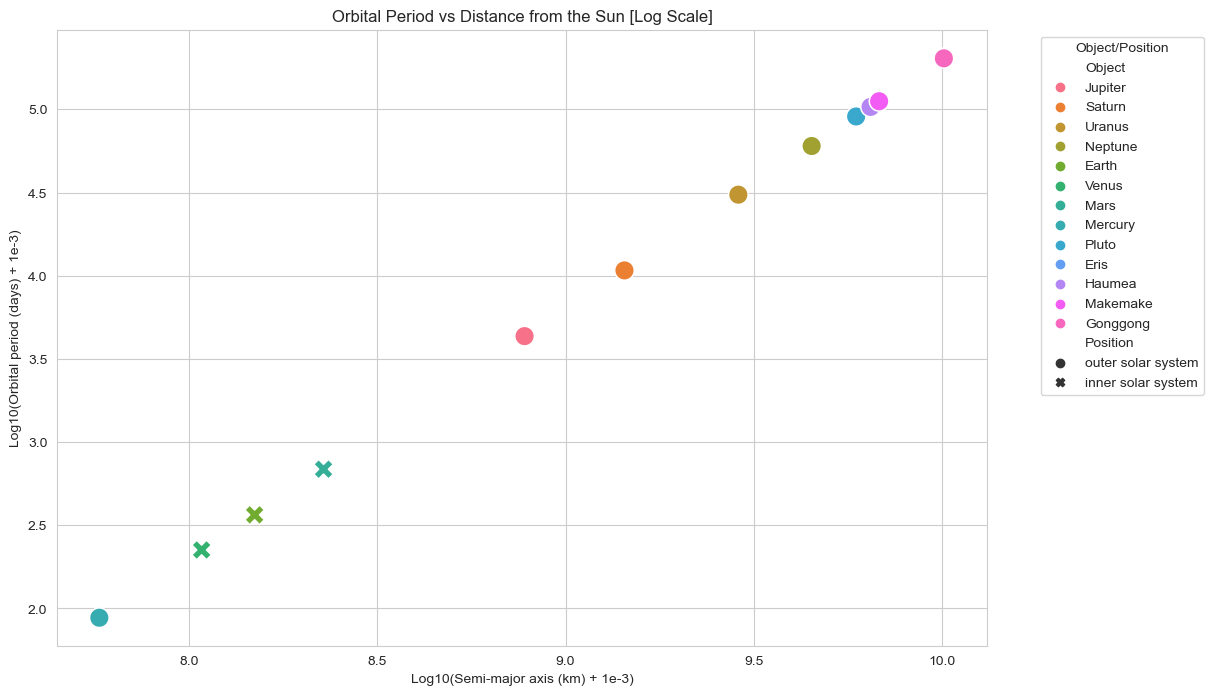

In [12]:
planets = df[df['Type'].str.contains('planet', case=False, na=False)]

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=np.log10(planets['Semi-major axis (km)'] + 1e-3),
    y=np.log10(planets['Orbital period (days)'] + 1e-3),
    hue=planets['Object'],
    style=planets['Position'], 
    palette='husl',
    s=200
)

plt.xlabel('Log10(Semi-major axis (km) + 1e-3)')
plt.ylabel('Log10(Orbital period (days) + 1e-3)')
plt.title('Orbital Period vs Distance from the Sun [Log Scale]')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Object/Position')
plt.show()


#### Observations:
- **Distance and Orbital Period**: There is a positive correlation between the semi-major axis (distance from the Sun) and the orbital period of celestial bodies. As the distance from the Sun increases, the orbital period also increases.
- **Gas Giants**: The gas giants (Jupiter, Saturn, Uranus, and Neptune) have longer orbital periods and are located farther from the Sun. This is evident from their positions in the upper right section of the plot.
- **Inner vs. Outer Solar System**: Celestial bodies in the inner solar system (marked with X) have shorter orbital periods and smaller distances from the Sun compared to those in the outer solar system (marked with O).
- **Dwarf Planets**: Dwarf planets such as Pluto, Haumea, Makemake, and Gonggong, located in the outer solar system, exhibit long orbital periods, highlighting their significant distance from the Sun.

## Conclusion and Personal Reflection

This project was my first attempt at analyzing an astronomy dataset using Python. It allowed me to enhance my skills in data handling, visualization, and analysis. Motivated by my interest in both data science and astronomy, I chose this dataset.

I look forward to applying these skills to more complex datasets and conducting deeper statistical analyses in future projects!

## References

- Kaggle Dataset: Banerjee, Sourav. "Planet Dataset." Kaggle, 2022. Available at: https://www.kaggle.com/datasets/iamsouravbanerjee/planet-dataset

- [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/)
- [Hubble Telescope Public Data](https://archive.stsci.edu/hst/)
- [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
- [Seaborn Documentation](https://seaborn.pydata.org/)